In [1]:
# libraries
import numpy as np
import pandas as pd
import pyreadr
import scipy
import matplotlib.pyplot as plt

In [2]:
perfomances_dt2 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt2.rds")[None] # also works for RData
W_peak_dt = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/W_peak_dt.rds")[None] # also works for RData


In [3]:
W_peak_dt = W_peak_dt[['NMS','policy']]
#add the baselevel
df = pd.DataFrame({'NMS': ['2'],
                   'policy': ['fee_0']})
W_peak_dt = W_peak_dt.append(df, ignore_index=True)

#Filter the columns that are at the peak
keys = list(W_peak_dt.columns.values)
i1 = perfomances_dt2.set_index(keys).index
i2 = W_peak_dt.set_index(keys).index
perfomances_opt_df = perfomances_dt2[i1.isin(i2)].reset_index()
#Rename the base-level
perfomances_opt_df.loc[perfomances_opt_df.policy == "fee_0","policy"]= "nopolicy_0"
# Get the base-level  data and name it with a zero
baselevel_df = perfomances_dt2.loc[(perfomances_dt2.policy == "fee_0")& (perfomances_dt2.NMS == "1"),['id_10', 'id_field', 'z', 'N_fert','L','P']]
baselevel_df = baselevel_df.rename(columns={"N_fert":"N_fert_0", "L": "L_0", "P": "P_0"})

# Merge it with the perfomances_opt_df
perfomances_opt_df = pd.merge(perfomances_opt_df, baselevel_df,  how='left', left_on=['id_10', 'id_field', 'z'], right_on = ['id_10', 'id_field', 'z'])

# Calculate the differences in P and L
perfomances_opt_df['P_diff'] = perfomances_opt_df['P'] - perfomances_opt_df['P_0']
perfomances_opt_df['L_diff'] = perfomances_opt_df['L'] - perfomances_opt_df['L_0']



In [4]:
#Average across z
# perfomances_opt_df2 = perfomances_opt_df.groupby(['policy', 'NMS', 'id_10', 'id_field'], as_index=False).mean()
perfomances_opt_df2 = perfomances_opt_df.groupby(['policy', 'NMS', 'id_10', 'id_field']).mean().reset_index().drop(['index'], axis=1)

# new data frame with split value columns 
perfomances_opt_df2['policy_name'] = perfomances_opt_df2["policy"].str.split("_", n = 1, expand = True)[0]  
perfomances_opt_df2['policy_val'] = perfomances_opt_df2["policy"].str.split("_", n = 1, expand = True)[1]  
perfomances_opt_df2 = perfomances_opt_df2[perfomances_opt_df2.L_0 < 200]

In [5]:
# ratio_1_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'ratio') & (perfomances_dt5['NMS'] == '1')]
# fee_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'fee') & (perfomances_dt5['NMS'] == '1')]
# nred_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'nred') & (perfomances_dt5['NMS'] == '1')]
# subs_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'subs') & (perfomances_dt5['NMS'] == '1')]

ratio_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'ratio') & (perfomances_opt_df2['NMS'] == '2')]
fee_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'fee') & (perfomances_opt_df2['NMS'] == '2')]
nred_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'nred') & (perfomances_opt_df2['NMS'] == '2')]
nopolicy_2_dt = perfomances_opt_df2[(perfomances_opt_df2['policy_name'] == 'nopolicy') & (perfomances_opt_df2['NMS'] == '2')]

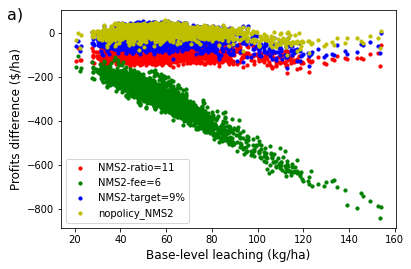

In [6]:
# Profits change by base-level L
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
# ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.scatter(ratio_2_dt['L_0'], ratio_2_dt['P_diff'], color = 'r',  label = 'NMS2-ratio=11', s = 10)
ax.scatter(fee_2_dt['L_0'], fee_2_dt['P_diff'], color = 'g', label = 'NMS2-fee=6', s = 10)
ax.scatter(nred_2_dt['L_0'], nred_2_dt['P_diff'], color = 'b', label = 'NMS2-target=9%', s = 10)
ax.scatter(nopolicy_2_dt['L_0'], nopolicy_2_dt['P_diff'], color = 'y', label = 'nopolicy_NMS2', s = 10)
# ax.plot(subs_2_dt['L_change'], subs_2_dt['C'], color = 'y', label = 'subs_NMS2')

plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Profits difference ($/ha)", size = 12)
plt.gcf().text(0, 0.85, 'a)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_a.png"
plt.savefig(plot_file_name, dpi=300)

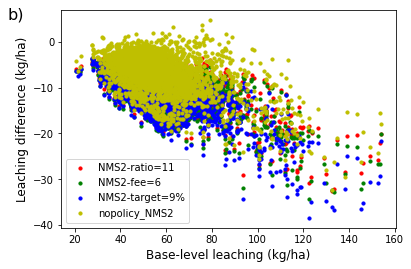

In [7]:
# L change by base-level L
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
# ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.scatter(ratio_2_dt['L_0'], ratio_2_dt['L_diff'], color = 'r',  label = 'NMS2-ratio=11', s = 10)
ax.scatter(fee_2_dt['L_0'], fee_2_dt['L_diff'], color = 'g', label = 'NMS2-fee=6', s = 10)
ax.scatter(nred_2_dt['L_0'], nred_2_dt['L_diff'], color = 'b', label = 'NMS2-target=9%', s = 10)
ax.scatter(nopolicy_2_dt['L_0'], nopolicy_2_dt['L_diff'], color = 'y', label = 'nopolicy_NMS2', s = 10)
plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Leaching difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'b)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_b.png"
plt.savefig(plot_file_name, dpi=300)

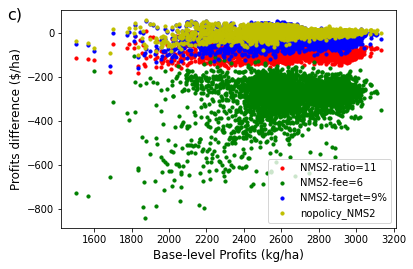

In [8]:
# Profits change by base-level P
 
fig, ax = plt.subplots()
# ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
# ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
# ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.scatter(ratio_2_dt['P_0'], ratio_2_dt['P_diff'], color = 'r',  label = 'NMS2-ratio=11', s = 10)
ax.scatter(fee_2_dt['P_0'], fee_2_dt['P_diff'], color = 'g', label = 'NMS2-fee=6', s = 10)
ax.scatter(nred_2_dt['P_0'], nred_2_dt['P_diff'], color = 'b', label = 'NMS2-target=9%', s = 10)
ax.scatter(nopolicy_2_dt['P_0'], nopolicy_2_dt['P_diff'], color = 'y', label = 'nopolicy_NMS2', s = 10)
# ax.plot(subs_2_dt['L_change'], subs_2_dt['C'], color = 'y', label = 'subs_NMS2')

plt.legend()

plt.xlabel("Base-level Profits (kg/ha)", size = 12)
plt.ylabel("Profits difference ($/ha)", size = 12)
plt.gcf().text(0, 0.85, 'c)', fontsize=16)
# ax.set_xticks((np.arange(0, 21, 1)))

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_scatter_c.png"
plt.savefig(plot_file_name, dpi=300)

index      policy NMS    L_0_bin    P_diff                 
                                        mean        std count
4     4  nopolicy_0   2    (0, 45]  0.249682  15.190228   689
5     5  nopolicy_0   2   (45, 55]  4.903097  13.605120  1514
6     6  nopolicy_0   2   (55, 65]  5.302298  14.187880   936
7     7  nopolicy_0   2  (65, 160] -0.205488  21.600378   778

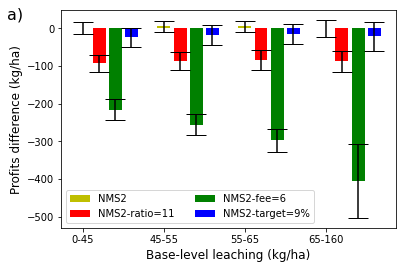

In [9]:
# BARCHART P_diff by base-level L 

# cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# cut_bins = [0, 70000, 100000, 130000, 200000]
# df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)
cut_bins = [0, 45, 55, 65, 160]

perfomances_opt_df2['L_0_bin'] = pd.cut(perfomances_opt_df2['L_0'], bins=cut_bins)
perfomances_opt_df2

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == '2'].groupby(['policy', 'NMS', 'L_0_bin'], 
                                                                     as_index=False).agg(
                      {'P_diff':['mean','std', 'count']}).reset_index()
bar_dt

bar_ratio_dt = bar_dt[(bar_dt['policy'] == 'ratio_11') ]
bar_fee_dt = bar_dt[(bar_dt['policy'] == 'fee_6')]
bar_nred_dt = bar_dt[(bar_dt['policy'] == 'nred_0.91')]
bar_nopolicy_dt = bar_dt[(bar_dt['policy'] == 'nopolicy_0')]

fig, ax = plt.subplots()

pos1 = [0,5,10,15]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]

ax.bar(x = pos1, height = bar_nopolicy_dt['P_diff']['mean'],color = 'y', label = 'NMS2',
      yerr=bar_nopolicy_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_ratio_dt['P_diff']['mean'],color = 'r', label = 'NMS2-ratio=11',
      yerr=bar_ratio_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_fee_dt['P_diff']['mean'],color = 'g', label = 'NMS2-fee=6',
      yerr=bar_fee_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_nred_dt['P_diff']['mean'],color = 'b', label = 'NMS2-target=9%',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)



plt.legend()

plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Profits difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'a)', fontsize=16)
plt.xticks(pos1, ['0-45', '45-55', '55-65', '65-160'])
plt.legend(ncol=2)
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_a.png"
plt.savefig(plot_file_name, dpi=300)
bar_nopolicy_dt

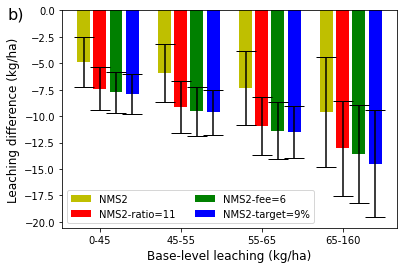

In [10]:
# BARCHART L change by base-level L 

# cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# cut_bins = [0, 70000, 100000, 130000, 200000]
# df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)
cut_bins = [0, 45, 55, 65, 160]

perfomances_opt_df2['L_0_bin'] = pd.cut(perfomances_opt_df2['L_0'], bins=cut_bins)
perfomances_opt_df2

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == '2'].groupby(['policy', 'NMS', 'L_0_bin'], 
                                                                     as_index=False).agg(
                      {'L_diff':['mean','std', 'count']}).reset_index()
bar_dt

bar_ratio_dt = bar_dt[(bar_dt['policy'] == 'ratio_11') ]
bar_fee_dt = bar_dt[(bar_dt['policy'] == 'fee_6')]
bar_nred_dt = bar_dt[(bar_dt['policy'] == 'nred_0.91')]
bar_nopolicy_dt = bar_dt[(bar_dt['policy'] == 'nopolicy_0')]

fig, ax = plt.subplots()

pos1 = [0,5,10,15]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]

ax.bar(x = pos1, height = bar_nopolicy_dt['L_diff']['mean'],color = 'y', label = 'NMS2',
      yerr=bar_nopolicy_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_ratio_dt['L_diff']['mean'],color = 'r',label = 'NMS2-ratio=11',
      yerr=bar_ratio_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_fee_dt['L_diff']['mean'],color = 'g',label = 'NMS2-fee=6',
      yerr=bar_fee_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_nred_dt['L_diff']['mean'],color = 'b',label = 'NMS2-target=9%',
      yerr=bar_nred_dt['L_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)


plt.gcf().text(0, 0.85, 'b)', fontsize=16)
plt.xlabel("Base-level leaching (kg/ha)", size = 12)
plt.ylabel("Leaching difference (kg/ha)", size = 12)

plt.xticks(pos2, ['0-45', '45-55', '55-65', '65-160'])
plt.legend(ncol=2)
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_b.png"
plt.savefig(plot_file_name, dpi=300)

index    policy NMS       P_0_bin     P_diff                 
                                           mean        std count
12    12  ratio_11   2     (0, 2500] -88.310113  33.413510   857
13    13  ratio_11   2  (2500, 2600] -83.304876  26.787518   931
14    14  ratio_11   2  (2600, 2800] -84.426051  20.578045  1198
15    15  ratio_11   2  (2800, 5000] -93.703082  15.305380   931

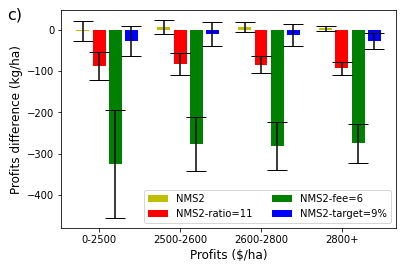

In [11]:
# BARCHART P_diff change by base-level L

# cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
# cut_bins = [0, 70000, 100000, 130000, 200000]
# df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)
cut_bins = [0, 2500, 2600, 2800, 5000]

perfomances_opt_df2['P_0_bin'] = pd.cut(perfomances_opt_df2['P_0'], bins=cut_bins)

bar_dt = perfomances_opt_df2[perfomances_opt_df2.NMS == '2'].groupby(['policy', 'NMS', 'P_0_bin'], 
                                                                     as_index=False).agg(
                      {'P_diff':['mean','std', 'count']}).reset_index()


bar_ratio_dt = bar_dt[(bar_dt['policy'] == 'ratio_11') ]
bar_fee_dt = bar_dt[(bar_dt['policy'] == 'fee_6')]
bar_nred_dt = bar_dt[(bar_dt['policy'] == 'nred_0.91')]
bar_nopolicy_dt = bar_dt[(bar_dt['policy'] == 'nopolicy_0')]

fig, ax = plt.subplots()

pos1 = [0,5,10,15]
pos2 = [x + 1 for x in pos1] 
pos3 = [x + 2 for x in pos1]
pos4 = [x + 3 for x in pos1]

ax.bar(x = pos1, height = bar_nopolicy_dt['P_diff']['mean'],color = 'y', label = 'NMS2',
      yerr=bar_nopolicy_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos2, height = bar_ratio_dt['P_diff']['mean'],color = 'r', label = 'NMS2-ratio=11',
      yerr=bar_ratio_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos3, height = bar_fee_dt['P_diff']['mean'],color = 'g', label = 'NMS2-fee=6',
      yerr=bar_fee_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

ax.bar(x = pos4, height = bar_nred_dt['P_diff']['mean'],color = 'b', label = 'NMS2-target=9%',
      yerr=bar_nred_dt['P_diff']['std'],align='center', alpha=1, ecolor='black', capsize=10)

plt.legend(ncol=2)

plt.xlabel("Profits ($/ha)", size = 12)
plt.ylabel("Profits difference (kg/ha)", size = 12)
plt.gcf().text(0, 0.85, 'c)', fontsize=16)

plt.xticks(pos2, ['0-2500', '2500-2600', '2600-2800', '2800+'])

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/field_effects_bar_c.png"
plt.savefig(plot_file_name, dpi=300)
bar_ratio_dt

Text(0, 0.5, 'Density')

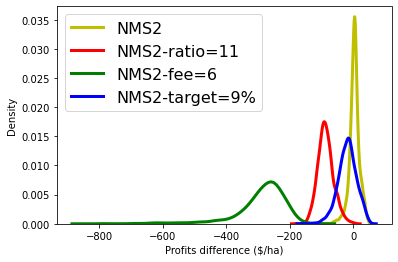

In [12]:
import seaborn as sns

sns.distplot(nopolicy_2_dt['P_diff'], hist = False, kde = True,color = 'y', kde_kws = {'linewidth': 3}, label = 'NMS2')
sns.distplot(ratio_2_dt['P_diff'], hist = False, kde = True,color = 'r', kde_kws = {'linewidth': 3}, label = 'NMS2-ratio=11')
sns.distplot(fee_2_dt['P_diff'], hist = False, kde = True,color = 'g', kde_kws = {'linewidth': 3}, label = 'NMS2-fee=6')
sns.distplot(nred_2_dt['P_diff'], hist = False, kde = True,color = 'b', kde_kws = {'linewidth': 3}, label = 'NMS2-target=9%')

# Plot formatting
plt.legend(prop={'size': 16})
# plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Profits difference ($/ha)')
plt.ylabel('Density')

In [23]:
perfomances_opt_df[perfomances_opt_df.NMS == '1']

,index,policy,region,id_10,NMS,tech,z,id_field,Y_corn,Y_soy,...,L,N_fert,P,G,area_ha,N_fert_0,L_0,P_0,P_diff,L_diff
0,17,ratio_15,3,5,1,UR,11,1.0,12764.323407,3566.261130,...,40.265013,110.0,2643.619592,138.600000,40.0,160.0,44.633445,2812.006190,-168.386598,-4.368432
1,39,fee_14,3,5,1,UR,11,1.0,12453.169008,3565.799575,...,40.134720,100.0,2185.031130,561.886084,40.0,160.0,44.633445,2812.006190,-626.975060,-4.498725
2,55,nred_0.83,3,5,1,UR,11,1.0,12453.169008,3565.799575,...,40.134720,100.0,2746.917214,0.000000,40.0,160.0,44.633445,2812.006190,-65.088976,-4.498725
7,203,ratio_15,3,5,1,UR,11,3.0,13123.507931,3581.077647,...,54.111243,110.0,2698.424067,138.600000,40.0,160.0,55.973039,2838.143915,-139.719849,-1.861796
8,225,fee_14,3,5,1,UR,11,3.0,12835.443980,3581.077647,...,53.804670,100.0,2051.829738,753.265376,40.0,160.0,55.973039,2838.143915,-786.314178,-2.168369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274247,7287147,fee_14,1,1522,1,UR,29,1.0,12233.991231,3050.655745,...,69.246965,110.0,1581.269719,969.457508,40.0,170.0,89.045349,2604.591592,-1023.321873,-19.798384
274248,7287163,nred_0.83,1,1522,1,UR,29,1.0,12233.991231,3050.655745,...,69.246965,110.0,2550.727227,0.000000,40.0,170.0,89.045349,2604.591592,-53.864365,-19.798384
274253,7287311,ratio_15,1,1522,1,UR,30,2.0,12177.268537,3023.927261,...,80.198243,120.0,2375.034577,151.200000,40.0,170.0,92.756379,2604.410997,-229.376420,-12.558136
274254,7287333,fee_14,1,1522,1,UR,30,2.0,11818.233255,3023.926537,...,78.672808,110.0,1382.950109,1101.419308,40.0,170.0,92.756379,2604.410997,-1221.460888,-14.083571


In [28]:
ratio_2_dt = perfomances_dt2[(perfomances_dt2.policy == 'ratio_11') & (perfomances_dt2.NMS == '2')]

ratio_2_dt

,policy,region,id_10,NMS,tech,z,id_field,Y_corn,Y_soy,L1,L2,L,N_fert,P,G,area_ha
104,ratio_11,3,5,2,UR,11,1.0,13222.466307,3567.805797,6.411643,35.617097,42.028739,140.0,2723.630680,98.0,40.0
290,ratio_11,3,5,2,UR,11,3.0,13413.055199,3581.077647,8.819799,45.981226,54.801025,140.0,2754.360684,98.0,40.0
476,ratio_11,3,5,2,UR,12,2.0,13848.228427,4336.860462,27.040608,23.761497,50.802105,110.0,3091.978492,77.0,40.0
662,ratio_11,3,5,2,UR,12,4.0,13843.741327,4360.364802,24.171367,18.843334,43.014701,110.0,3098.518493,77.0,40.0
848,ratio_11,3,5,2,UR,13,1.0,10635.569242,4315.315920,18.113718,11.417668,29.531386,130.0,2604.835696,91.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286654,ratio_11,1,1522,2,UR,26,2.0,12719.860053,2555.402353,29.599957,30.103864,59.703821,130.0,2359.909816,91.0,40.0
7286840,ratio_11,1,1522,2,UR,27,1.0,13046.682123,2654.180000,40.451334,19.204275,59.655609,140.0,2420.389448,98.0,40.0
7287026,ratio_11,1,1522,2,UR,28,2.0,12266.079557,3654.103514,38.151106,26.742462,64.893568,180.0,2554.455032,126.0,40.0
7287212,ratio_11,1,1522,2,UR,29,1.0,12693.635575,3050.655745,37.959594,40.294914,78.254508,140.0,2491.877435,98.0,40.0


In [ ]:
pd.melt(ratio_2_dt, id_vars=['policy', 'id_10', 'id_field', 'z','NMS'], value_vars=['Y_corn', 'Y_soy', , 'L1' ,'L2',
                                                                                    'N_fert', 'P', 'G'])